In [3]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
squeezenet = models.squeezenet1_0(pretrained=True)
densenmet = models.densenet161(pretrained=True)
inception = models.inception_v3(pretrained=True)
googlenet = models.googlenet(pretrained=True)
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
mobilenet = models.mobilenet_v2(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
mnasnet = models.mnasnet1_0(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-a815701f.pth


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth


Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth


Downloading: "https://download.pytorch.org/models/mnasnet1.0_top1_73.512-f206786ef8.pth" to /root/.cache/torch/hub/checkpoints/mnasnet1.0_top1_73.512-f206786ef8.pth


In [15]:
batch_size = 64
epochs = 3
learning_rate = 0.001

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(), # 텐서 형태로 변환
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # 정규화 transform.Normalize(mean, std, inplace(bool))
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                            shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                         download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


In [1]:
# !wget http://www.image-net.org/challenges/LSVRC/2012/dd31405981ef5f776aa17412e1f0c112/ILSVRC2012_devkit_t12.tar.gz
# !wget http://www.image-net.org/challenges/LSVRC/2012/dd31405981ef5f776aa17412e1f0c112/ILSVRC2012_img_train.tar

--2021-02-04 12:46:01--  http://www.image-net.org/challenges/LSVRC/2012/dd31405981ef5f776aa17412e1f0c112/ILSVRC2012_img_train.tar
Resolving www.image-net.org (www.image-net.org)... 171.64.68.16
Connecting to www.image-net.org (www.image-net.org)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147897477120 (138G) [application/x-tar]
Saving to: ‘ILSVRC2012_img_train.tar’

ILSVRC2012_img_trai   2%[                    ]   3.08G  4.02MB/s    eta 4h 24m ^C


In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 ship   car horse   car


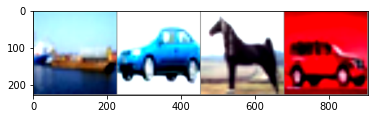

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5 # unnormalized,  [-1,1]->[0,1]
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0))) # rgb 차원을 뒤로 보내주기 위함 (3, 36, 138) -> (36, 138, 3)
  

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 1. AlexNet

In [7]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [11]:
import torch.nn as nn

in_features = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(in_features, len(classes))
alexnet = alexnet.to(device)
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=learning_rate, momentum=0.9)

In [18]:
# Train model (alexnet)
for epoch in range(epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    outputs = alexnet(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss = loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

print('\nFinished Traning')

[1,  2000] loss: 0.000
[1,  4000] loss: 0.000
[1,  6000] loss: 0.000
[1,  8000] loss: 0.000
[1, 10000] loss: 0.000
[1, 12000] loss: 0.001
[2,  2000] loss: 0.001
[2,  4000] loss: 0.000
[2,  6000] loss: 0.000
[2,  8000] loss: 0.000
[2, 10000] loss: 0.000
[2, 12000] loss: 0.000
[3,  2000] loss: 0.000
[3,  4000] loss: 0.000
[3,  6000] loss: 0.000
[3,  8000] loss: 0.000
[3, 10000] loss: 0.000
[3, 12000] loss: 0.000

Finished Traning


In [21]:
correct = 0
total = 0 
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = alexnet(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 79 %


In [25]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = alexnet(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels)
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

  for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 81 %
Accuracy of   car : 89 %
Accuracy of  bird : 67 %
Accuracy of   cat : 51 %
Accuracy of  deer : 81 %
Accuracy of   dog : 84 %
Accuracy of  frog : 85 %
Accuracy of horse : 81 %
Accuracy of  ship : 89 %
Accuracy of truck : 87 %


## 2. VGGNet

In [26]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [33]:
in_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(in_features, len(classes))
vggnet = vgg16.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vggnet.parameters(), lr=learning_rate, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [34]:
# Train model (vggnet)
print('**VGG16 Training**')

for epoch in range(epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    outputs = vggnet(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss = loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

print('\nFinished Traning')

**VGG16 Training**
[1,  2000] loss: 0.000
[1,  4000] loss: 0.001
[1,  6000] loss: 0.000
[1,  8000] loss: 0.000
[1, 10000] loss: 0.000
[1, 12000] loss: 0.000
[2,  2000] loss: 0.000
[2,  4000] loss: 0.000
[2,  6000] loss: 0.000
[2,  8000] loss: 0.000
[2, 10000] loss: 0.000
[2, 12000] loss: 0.000
[3,  2000] loss: 0.000
[3,  4000] loss: 0.000
[3,  6000] loss: 0.000
[3,  8000] loss: 0.000
[3, 10000] loss: 0.000
[3, 12000] loss: 0.000

Finished Traning


In [35]:
correct = 0
total = 0 
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = vggnet(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 88 %


In [36]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = vggnet(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels)
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

  for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 93 %
Accuracy of   car : 94 %
Accuracy of  bird : 88 %
Accuracy of   cat : 75 %
Accuracy of  deer : 92 %
Accuracy of   dog : 83 %
Accuracy of  frog : 89 %
Accuracy of horse : 92 %
Accuracy of  ship : 81 %
Accuracy of truck : 93 %


## 3. ResNet

In [37]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [41]:
in_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(in_features, len(classes))
resnet = resnet18.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=learning_rate, momentum=0.9)

In [42]:
# Train model (resnet)
print('**resnet18 Training**')

for epoch in range(epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    outputs = resnet(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss = loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

print('\nFinished Traning')

**resnet18 Training**
[1,  2000] loss: 0.001
[1,  4000] loss: 0.000
[1,  6000] loss: 0.000
[1,  8000] loss: 0.000
[1, 10000] loss: 0.000
[1, 12000] loss: 0.001
[2,  2000] loss: 0.000
[2,  4000] loss: 0.000
[2,  6000] loss: 0.000
[2,  8000] loss: 0.000
[2, 10000] loss: 0.000
[2, 12000] loss: 0.000
[3,  2000] loss: 0.000
[3,  4000] loss: 0.000
[3,  6000] loss: 0.000
[3,  8000] loss: 0.000
[3, 10000] loss: 0.001
[3, 12000] loss: 0.000

Finished Traning


In [44]:
correct = 0
total = 0 
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = resnet(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 87 %


In [45]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = resnet(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels)
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

  for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 87 %
Accuracy of   car : 86 %
Accuracy of  bird : 80 %
Accuracy of   cat : 81 %
Accuracy of  deer : 75 %
Accuracy of   dog : 87 %
Accuracy of  frog : 93 %
Accuracy of horse : 91 %
Accuracy of  ship : 94 %
Accuracy of truck : 96 %


## 4. DenseNet

In [43]:
densenmet

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [46]:
in_features = densenmet.classifier.in_features
densenmet.classifier = nn.Linear(in_features, len(classes))
densenet = densenmet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(densenet.parameters(), lr=learning_rate, momentum=0.9)

In [47]:
# Train model (densenet)
print('**densenet Training**')

for epoch in range(epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    outputs = densenet(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss = loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

print('\nFinished Traning')

**densenet Training**
[1,  2000] loss: 0.000
[1,  4000] loss: 0.000
[1,  6000] loss: 0.000
[1,  8000] loss: 0.000
[1, 10000] loss: 0.000
[1, 12000] loss: 0.000
[2,  2000] loss: 0.000
[2,  4000] loss: 0.000
[2,  6000] loss: 0.000
[2,  8000] loss: 0.001
[2, 10000] loss: 0.000
[2, 12000] loss: 0.000
[3,  2000] loss: 0.000
[3,  4000] loss: 0.000
[3,  6000] loss: 0.000
[3,  8000] loss: 0.000
[3, 10000] loss: 0.000
[3, 12000] loss: 0.000

Finished Traning


In [48]:
correct = 0
total = 0 
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = densenet(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 91 %


In [49]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = densenet(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels)
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

  for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 94 %
Accuracy of   car : 95 %
Accuracy of  bird : 89 %
Accuracy of   cat : 84 %
Accuracy of  deer : 92 %
Accuracy of   dog : 86 %
Accuracy of  frog : 94 %
Accuracy of horse : 93 %
Accuracy of  ship : 95 %
Accuracy of truck : 90 %
